In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import seaborn as sns


import plotly.graph_objects as go
import plotly.express as px

from scipy.io import loadmat

import pandas as pd

from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tqdm import tqdm
from numpy.random import seed
from time import time

seed(11)


In [2]:
data= loadmat('PaviaU.mat')['paviaU']
gt=loadmat('PaviaU_gt.mat')['paviaU_gt']
print(f'Data Shape: {data.shape[:-1]}\nNumber of Bands: {data.shape[-1]}')

Data Shape: (610, 340)
Number of Bands: 103


In [144]:
len(data.reshape(data.shape[0]*data.shape[1], -1))

207400

In [145]:
len(data)

610

In [147]:
data.shape

(610, 340, 103)

In [3]:
df = pd.DataFrame(data.reshape(data.shape[0]*data.shape[1], -1))

df.columns = [f'band{i}' for i in range(1, df.shape[-1]+1)]

df['class'] = gt.ravel()

In [4]:
df.head()

band1  band2  band3  band4  band5  band6  band7  band8  band9  band10  ...  \
0    647    499    464    371    291    319    365    322    296     305  ...   
1    604    546    527    455    378    377    336    314    324     329  ...   
2    621    746    556    360    285    300    274    276    332     319  ...   
3    637    592    482    556    508    284    178    198    193     224  ...   
4    625    560    480    360    377    341    264    208    231     266  ...   

   band95  band96  band97  band98  band99  band100  band101  band102  band103  \
0    3416    3335    3256    3226    3205     3210     3221     3238     3250   
1    2583    2538    2509    2511    2501     2468     2442     2464     2528   
2    2288    2242    2193    2202    2225     2266     2308     2345     2361   
3    2675    2609    2541    2551    2571     2569     2573     2620     2644   
4    2392    2344    2289    2328    2415     2424     2386     2431     2456   

   class  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 104 columns]

In [100]:
df.head(610)

band1  band2  band3  band4  band5  band6  band7  band8  band9  band10  \
0      647    499    464    371    291    319    365    322    296     305   
1      604    546    527    455    378    377    336    314    324     329   
2      621    746    556    360    285    300    274    276    332     319   
3      637    592    482    556    508    284    178    198    193     224   
4      625    560    480    360    377    341    264    208    231     266   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
605   1116    720    718    854    778    616    572    636    647     679   
606    417    477    606    540    383    454    600    618    549     552   
607    988    762    838    815    718    667    655    515    327     285   
608   1029    809    659    579    562    475    412    459    531     544   
609    679    725    627    653    661    626    548    461    494     540   

     ...  band95  band96  band97  band98  band99  band100  band101  band102  \
0    ...    3416    3335    3256    3226    3205     3210     3221     3238   
1    ...    2583    2538    2509    2511    2501     2468     2442     2464   
2    ...    2288    2242    2193    2202    2225     2266     2308     2345   
3    ...    2675    2609    2541    2551    2571     2569     2573     2620   
4    ...    2392    2344    2289    2328    2415     2424     2386     2431   
..   ...     ...     ...     ...     ...     ...      ...      ...      ...   
605  ...    1137    1121    1140    1160    1142     1102     1123     1130   
606  ...    1100    1129    1165    1109    1050     1052     1055     1074   
607  ...    1141    1104    1114    1134    1123     1132     1155     1123   
608  ...    1236    1225    1192    1180    1204     1210     1184     1114   
609  ...    1188    1190    1188    1171    1150     1135     1115     1151   

     band103  class  
0       3250      0  
1       2528      0  
2       2361      0  
3       2644      0  
4       2456      0  
..       ...    ...  
605     1125      0  
606     1074      0  
607     1087      0  
608     1075      0  
609     1166      0  

[610 rows x 104 columns]

In [94]:
df.shape

(207400, 104)

In [59]:
df.iloc[:,0]

0         647
1         604
2         621
3         637
4         625
         ... 
207395    574
207396    485
207397    593
207398    593
207399    889
Name: band1, Length: 207400, dtype: uint16

In [106]:
df.head(340)

band1  band2  band3  band4  band5  band6  band7  band8  band9  band10  \
0      647    499    464    371    291    319    365    322    296     305   
1      604    546    527    455    378    377    336    314    324     329   
2      621    746    556    360    285    300    274    276    332     319   
3      637    592    482    556    508    284    178    198    193     224   
4      625    560    480    360    377    341    264    208    231     266   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
335    802    704    508    540    614    519    391    441    457     426   
336    603    548    493    440    477    499    497    462    380     378   
337    524    525    598    578    429    284    373    458    481     494   
338    528    330     70    227    322    408    505    505    508     538   
339    711    483    423    398    445    443    408    424    436     482   

     ...  band95  band96  band97  band98  band99  band100  band101  band102  \
0    ...    3416    3335    3256    3226    3205     3210     3221     3238   
1    ...    2583    2538    2509    2511    2501     2468     2442     2464   
2    ...    2288    2242    2193    2202    2225     2266     2308     2345   
3    ...    2675    2609    2541    2551    2571     2569     2573     2620   
4    ...    2392    2344    2289    2328    2415     2424     2386     2431   
..   ...     ...     ...     ...     ...     ...      ...      ...      ...   
335  ...    3062    3111    3111    3039    3005     3036     3044     3036   
336  ...    3180    3231    3250    3168    3094     3086     3077     3087   
337  ...    2967    2984    2995    2965    2929     2933     2936     2940   
338  ...    2821    2855    2879    2861    2817     2760     2737     2774   
339  ...    2519    2534    2571    2594    2563     2539     2562     2539   

     band103  class  
0       3250      0  
1       2528      0  
2       2361      0  
3       2644      0  
4       2456      0  
..       ...    ...  
335     3072      0  
336     3091      0  
337     2950      0  
338     2829      0  
339     2488      0  

[340 rows x 104 columns]

In [119]:
len(data[:, :, 0])

610

In [75]:
len(data[:, :, 3])

610

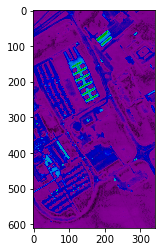

In [22]:
plt.imshow(data[:, :, 3], cmap='nipy_spectral')


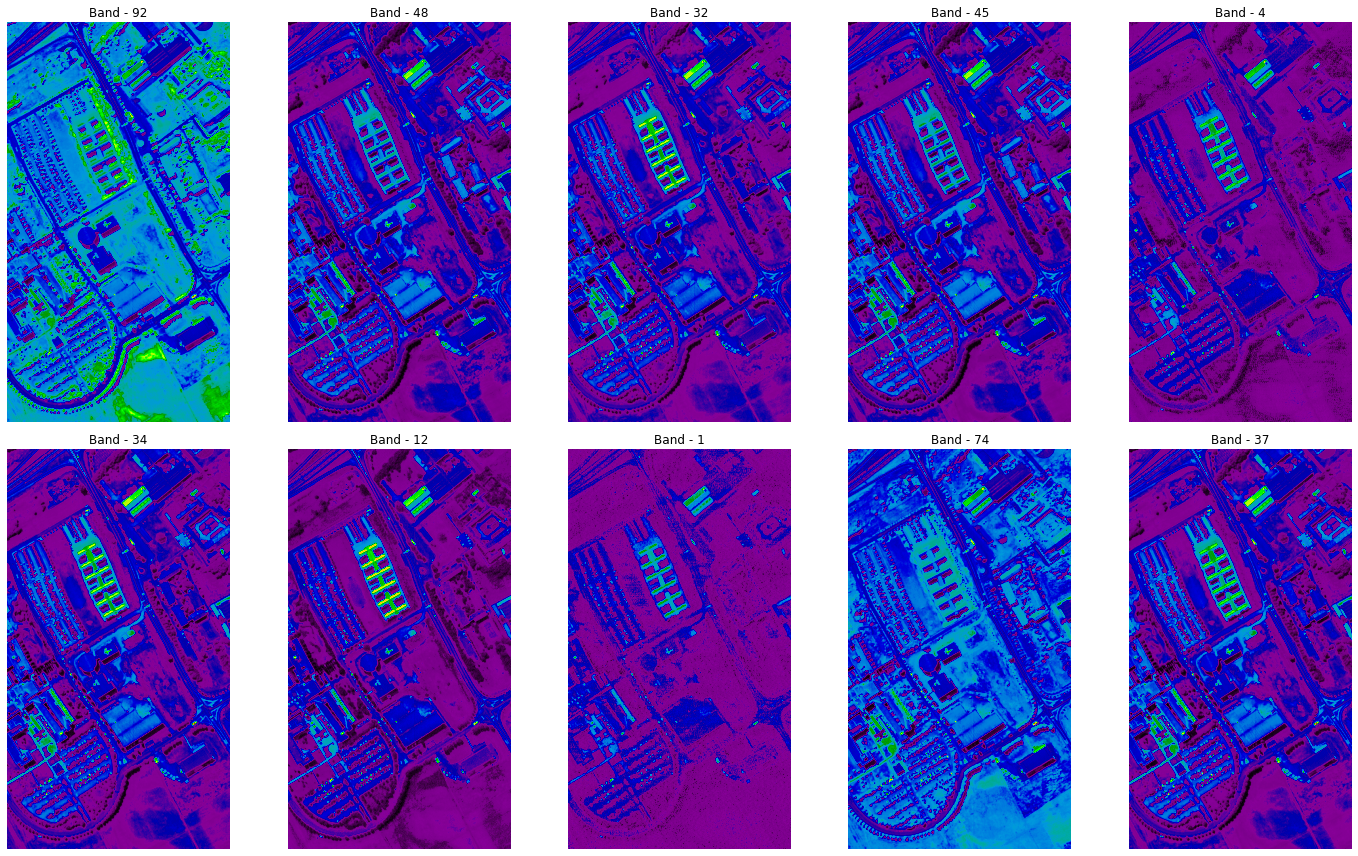

In [96]:
%matplotlib inline
fig=plt.figure(figsize=(20,12))

ax=fig.subplots(2,5)
for i in range(2):
    for j in range(5):
        c= np.random.randint(103)
        ax[i][j].imshow(data[:, :, c], cmap='nipy_spectral')
        ax[i][j].axis('off')
        ax[i][j].title.set_text(f"Band - {c}")
        c+=1

plt.tight_layout()
      

In [8]:
mdata = np.moveaxis(data, -1, 0)

ep.plot_rgb(mdata, (60, 30, 27), figsize=(12, 10)) 

plt.show()

NameError: name 'ep' is not defined

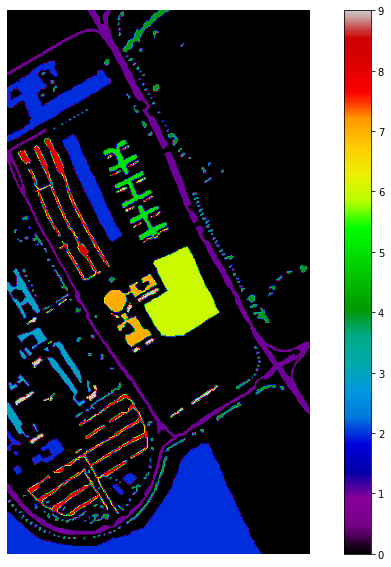

In [107]:
def plot_data(data):
    fig = plt.figure(figsize=(12, 10))
    plt.imshow(data, cmap='nipy_spectral')
    plt.colorbar()
    plt.axis('off')
    plt.show()

plot_data(gt)

In [8]:
ind = ['band'+str(i) for i in range(1, 103+1)]

X = df.loc[:, ind]

X_scaled = minmax_scale(X, axis = 0);

len(X_scaled[1])

103

In [26]:
ind

['band1',
 'band2',
 'band3',
 'band4',
 'band5',
 'band6',
 'band7',
 'band8',
 'band9',
 'band10',
 'band11',
 'band12',
 'band13',
 'band14',
 'band15',
 'band16',
 'band17',
 'band18',
 'band19',
 'band20',
 'band21',
 'band22',
 'band23',
 'band24',
 'band25',
 'band26',
 'band27',
 'band28',
 'band29',
 'band30',
 'band31',
 'band32',
 'band33',
 'band34',
 'band35',
 'band36',
 'band37',
 'band38',
 'band39',
 'band40',
 'band41',
 'band42',
 'band43',
 'band44',
 'band45',
 'band46',
 'band47',
 'band48',
 'band49',
 'band50',
 'band51',
 'band52',
 'band53',
 'band54',
 'band55',
 'band56',
 'band57',
 'band58',
 'band59',
 'band60',
 'band61',
 'band62',
 'band63',
 'band64',
 'band65',
 'band66',
 'band67',
 'band68',
 'band69',
 'band70',
 'band71',
 'band72',
 'band73',
 'band74',
 'band75',
 'band76',
 'band77',
 'band78',
 'band79',
 'band80',
 'band81',
 'band82',
 'band83',
 'band84',
 'band85',
 'band86',
 'band87',
 'band88',
 'band89',
 'band90',
 'band91',
 'band92

In [28]:
X.head()

band1  band2  band3  band4  band5  band6  band7  band8  band9  band10  ...  \
0    647    499    464    371    291    319    365    322    296     305  ...   
1    604    546    527    455    378    377    336    314    324     329  ...   
2    621    746    556    360    285    300    274    276    332     319  ...   
3    637    592    482    556    508    284    178    198    193     224  ...   
4    625    560    480    360    377    341    264    208    231     266  ...   

   band94  band95  band96  band97  band98  band99  band100  band101  band102  \
0    3420    3416    3335    3256    3226    3205     3210     3221     3238   
1    2605    2583    2538    2509    2511    2501     2468     2442     2464   
2    2282    2288    2242    2193    2202    2225     2266     2308     2345   
3    2684    2675    2609    2541    2551    2571     2569     2573     2620   
4    2423    2392    2344    2289    2328    2415     2424     2386     2431   

   band103  
0     3250  
1     2528  
2     2361  
3     2644  
4     2456  

[5 rows x 103 columns]

In [29]:
X_scaled

array([[0.080875  , 0.062375  , 0.058     , ..., 0.402625  , 0.39460971,
        0.40625   ],
       [0.0755    , 0.06825   , 0.065875  , ..., 0.30525   , 0.29621154,
        0.316     ],
       [0.077625  , 0.09325   , 0.0695    , ..., 0.2885    , 0.28108314,
        0.295125  ],
       ...,
       [0.074125  , 0.048375  , 0.0535    , ..., 0.29775   , 0.28896517,
        0.302875  ],
       [0.074125  , 0.093875  , 0.081875  , ..., 0.289     , 0.27637935,
        0.286125  ],
       [0.111125  , 0.09      , 0.056125  , ..., 0.302     , 0.29405034,
        0.310625  ]])

In [377]:
X_scaled.shape

(207400, 103)

In [9]:
ncol = X_scaled.shape[1]
ncol

103

In [11]:
# encoder dimension
encoding_dim = 60

input_dim = Input(shape = (ncol, ), name = 'InputLayer')


In [48]:
df.iloc[:,-1]

0         0
1         0
2         0
3         0
4         0
         ..
207395    0
207396    0
207397    0
207398    0
207399    0
Name: class, Length: 207400, dtype: uint8

In [5]:
import tensorflow.keras as keras
from tensorflow.keras import layers
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

# Autoencoder

In [10]:
encode_dim=60
input_img=keras.Input(shape=(ncol,))

In [11]:
def custom_relu(x):
    return tf.maximum(0.5,x)
# model = tf.keras.models.Sequential([
# #      tf.keras.layers.Flatten(input_shape=(128,128)),
#      tf.keras.layers.Dense(encode_dim),
#      tf.keras.layers.Lambda(custom_relu),
#      tf.keras.layers.Dense(5, activation = 'softmax')
# ])

In [64]:
encoded=layers.Dense(encode_dim,activation='relu')(input_img)
encoded=layers.Lambda(custom_relu)(encoded)
encoded=layers.Lambda(lambda x: tf.abs(x))(encoded)
decoded=layers.Dense(ncol,activation='tanh')(encoded)

In [65]:
autoencoder= keras.Model(input_img,decoded)

In [66]:
encoder=keras.Model(input_img,encoded)
encoded_input=keras.Input(shape=(encode_dim,))
decoded_layer=autoencoder.layers[-1]
decoder=keras.Model(encoded_input,decoded_layer(encoded_input))

In [67]:
opt= tf.keras.optimizers.Adam(
    learning_rate=0.0000001,
    beta_1=0.09,
    beta_2=0.0999,
    epsilon=1e-09,
    amsgrad=True,
    name="Adam",
    
)

In [68]:
autoencoder.compile(optimizer=opt,loss='mse')

In [69]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 103)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6240      
_________________________________________________________________
lambda_2 (Lambda)            (None, 60)                0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 60)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 103)               6283      
Total params: 12,523
Trainable params: 12,523
Non-trainable params: 0
_________________________________________________________________


In [70]:
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split
x_train,x_test=train_test_split(X_scaled,test_size=0.20,random_state=100)

In [71]:
print(x_train.shape)
print(x_test.shape)
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# print(x_train.shape)
# print(x_test.shape)

(165920, 103)
(41480, 103)


In [39]:
x_train

array([[0.049375  , 0.02525   , 0.05325   , ..., 0.281625  , 0.27167557,
        0.283125  ],
       [0.055     , 0.065875  , 0.04825   , ..., 0.365     , 0.35685228,
        0.378375  ],
       [0.1185    , 0.08975   , 0.086     , ..., 0.256     , 0.24281719,
        0.252125  ],
       ...,
       [0.052375  , 0.062375  , 0.067875  , ..., 0.296125  , 0.28616832,
        0.2955    ],
       [0.135375  , 0.123375  , 0.121875  , ..., 0.348625  , 0.33206204,
        0.3455    ],
       [0.093375  , 0.096375  , 0.08325   , ..., 0.3555    , 0.34159675,
        0.358375  ]])

In [20]:
x_test.shape, x_test.shape

((41480, 103), (41480, 103))

In [47]:
from scipy.stats import zscore
data_norm = zscore(X)

In [72]:
hist=autoencoder.fit(X_scaled, 
                X_scaled,
                epochs=25,
                batch_size=512,
                shuffle=False)
#                 validation_data=(x_test, x_test))


Epoch 1/25
406/406 [==============================] - 1s 2ms/step - loss: 0.1826
Epoch 2/25
406/406 [==============================] - 1s 2ms/step - loss: 0.1820
Epoch 3/25
406/406 [==============================] - 1s 2ms/step - loss: 0.1814
Epoch 4/25
406/406 [==============================] - 1s 2ms/step - loss: 0.1808
Epoch 5/25
406/406 [==============================] - 1s 2ms/step - loss: 0.1802
Epoch 6/25
406/406 [==============================] - 1s 2ms/step - loss: 0.1796
Epoch 7/25
406/406 [==============================] - 1s 2ms/step - loss: 0.1790
Epoch 8/25
406/406 [==============================] - 1s 2ms/step - loss: 0.1784
Epoch 9/25
406/406 [==============================] - 1s 2ms/step - loss: 0.1778
Epoch 10/25
406/406 [==============================] - 1s 2ms/step - loss: 0.1772
Epoch 11/25
406/406 [==============================] - 1s 2ms/step - loss: 0.1767
Epoch 12/25
406/406 [==============================] - 1s 2ms/step - loss: 0.1761
Epoch 13/25
406/406 [====

In [73]:
# encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(X_scaled)

In [23]:
encoded_imgs.shape

(41480, 60)

In [22]:
def plot_data(data):
    fig = plt.figure(figsize=(12, 10))
    plt.imshow(data, cmap='nipy_spectral')
    plt.colorbar()
    plt.axis('off')
    plt.show()

plot_data(encoded_imgs.reshape(244,170,60))

NameError: name 'encoded_imgs' is not defined

In [91]:
df1 = pd.DataFrame(encoded_imgs)

# df1.columns = [f'band{i}' for i in range(1, df.shape[-1]+1)]

df1.head()

0    1             2             3             4    5   \
0  17621.273438  0.0  17620.982422  17626.128906  17630.882812  0.0   
1  17100.146484  0.0  17099.966797  17098.988281  17107.910156  0.0   
2  22721.921875  0.0  22720.525391  22722.246094  22731.066406  0.0   
3  18557.957031  0.0  18556.505859  18560.150391  18566.257812  0.0   
4  16105.395508  0.0  16103.502930  16106.368164  16111.770508  0.0   

             6             7             8             9   ...   50  \
0  17644.785156  17641.816406  17617.933594  17621.251953  ...  0.0   
1  17117.416016  17112.392578  17103.021484  17104.498047  ...  0.0   
2  22747.580078  22741.685547  22721.742188  22723.611328  ...  0.0   
3  18580.431641  18576.757812  18555.537109  18557.880859  ...  0.0   
4  16124.568359  16120.580078  16103.364258  16105.237305  ...  0.0   

             51            52            53            54            55  \
0  17616.726562  17474.310547  17642.365234  17613.652344  17613.058594   
1  17096.605469  16958.757812  17115.783203  17096.369141  17090.021484   
2  22714.564453  22531.062500  22743.050781  22712.250000  22708.220703   
3  18551.087891  18401.523438  18576.816406  18549.371094  18547.613281   
4  16099.857422  15969.060547  16121.511719  16097.730469  16096.259766   

             56            57            58            59  
0  17631.300781  17614.927734  17626.412109  17620.986328  
1  17108.785156  17088.164062  17108.189453  17098.828125  
2  22733.804688  22708.347656  22729.482422  22718.890625  
3  18567.361328  18548.679688  18563.306641  18555.597656  
4  16113.479492  16096.695312  16110.276367  16103.468750  

[5 rows x 60 columns]

In [217]:
df1.iloc[:10,:]

0    1             2             3             4    5   \
0  17621.273438  0.0  17620.982422  17626.128906  17630.882812  0.0   
1  17100.146484  0.0  17099.966797  17098.988281  17107.910156  0.0   
2  22721.921875  0.0  22720.525391  22722.246094  22731.066406  0.0   
3  18557.957031  0.0  18556.505859  18560.150391  18566.257812  0.0   
4  16105.395508  0.0  16103.502930  16106.368164  16111.770508  0.0   
5  20974.521484  0.0  20974.345703  20982.912109  20988.921875  0.0   
6  22340.705078  0.0  22338.953125  22342.300781  22349.712891  0.0   
7  17084.878906  0.0  17083.732422  17085.582031  17092.091797  0.0   
8  10379.973633  0.0  10379.633789  10383.354492  10387.011719  0.0   
9  21568.066406  0.0  21566.806641  21568.548828  21577.062500  0.0   

             6             7             8             9   ...   50  \
0  17644.785156  17641.816406  17617.933594  17621.251953  ...  0.0   
1  17117.416016  17112.392578  17103.021484  17104.498047  ...  0.0   
2  22747.580078  22741.685547  22721.742188  22723.611328  ...  0.0   
3  18580.431641  18576.757812  18555.537109  18557.880859  ...  0.0   
4  16124.568359  16120.580078  16103.364258  16105.237305  ...  0.0   
5  21003.902344  21003.826172  20966.923828  20973.957031  ...  0.0   
6  22366.640625  22360.771484  22339.869141  22341.613281  ...  0.0   
7  17104.294922  17101.111328  17084.021484  17085.679688  ...  0.0   
8  10393.782227  10393.789062  10376.334961  10379.935547  ...  0.0   
9  21592.041016  21586.671875  21567.992188  21569.837891  ...  0.0   

             51            52            53            54            55  \
0  17616.726562  17474.310547  17642.365234  17613.652344  17613.058594   
1  17096.605469  16958.757812  17115.783203  17096.369141  17090.021484   
2  22714.564453  22531.062500  22743.050781  22712.250000  22708.220703   
3  18551.087891  18401.523438  18576.816406  18549.371094  18547.613281   
4  16099.857422  15969.060547  16121.511719  16097.730469  16096.259766   
5  20968.503906  20801.535156  21003.533203  20964.164062  20966.251953   
6  22333.216797  22152.089844  22362.414062  22331.041016  22327.837891   
7  17078.980469  16941.681641  17101.314453  17076.820312  17074.978516   
8  10376.759766  10294.438477  10393.343750  10374.924805  10375.187500   
9  21561.175781  21387.121094  21587.896484  21558.595703  21555.048828   

             56            57            58            59  
0  17631.300781  17614.927734  17626.412109  17620.986328  
1  17108.785156  17088.164062  17108.189453  17098.828125  
2  22733.804688  22708.347656  22729.482422  22718.890625  
3  18567.361328  18548.679688  18563.306641  18555.597656  
4  16113.479492  16096.695312  16110.276367  16103.468750  
5  20986.248047  20970.363281  20979.462891  20974.744141  
6  22352.330078  22327.912109  22348.240234  22337.896484  
7  17093.621094  17075.580078  17089.953125  17082.521484  
8  10385.464844  10377.061523  10382.368164  10379.801758  
9  21579.285156  21555.128906  21575.126953  21565.003906  

[10 rows x 60 columns]

In [92]:
df1.shape

(51850, 60)

In [162]:
image=encoded_imgs.reshape(610,int(encoded_imgs.shape[0]/610),-1)

In [24]:
img=encoded_imgs.reshape(244,170,-1)

In [28]:
img.shape

(244, 170, 60)

In [413]:
encoded_imgs.shape

(41480, 60)

In [414]:
img.shape

(244, 170, 60)

In [404]:
encoded_imgs[], cmap='nipy_spectral')

SyntaxError: invalid syntax (<ipython-input-404-b10113af6e7a>, line 1)

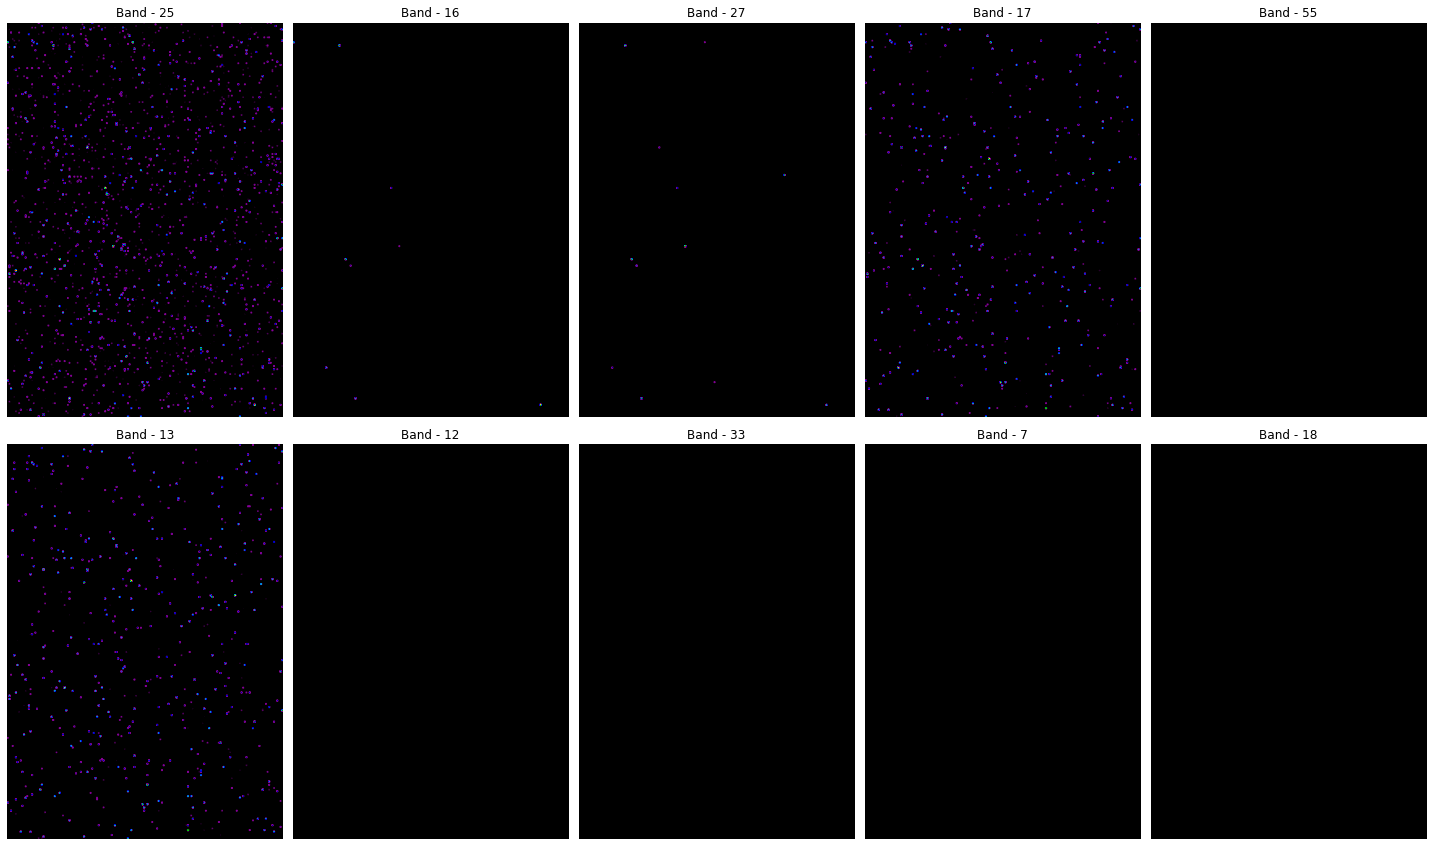

In [26]:
%matplotlib inline
fig=plt.figure(figsize=(20,12))

ax=fig.subplots(2,5)
for i in range(2):
    for j in range(5):
        c= np.random.randint(60)
        ax[i][j].imshow(img[:,:,c], cmap='nipy_spectral')
        ax[i][j].axis('off')
        ax[i][j].title.set_text(f"Band - {c}")
        c+=1

plt.tight_layout()
      

In [82]:
encoded_imgs[:,:]

array([[17621.273,     0.   , 17620.982, ..., 17614.928, 17626.412,
        17620.986],
       [17100.146,     0.   , 17099.967, ..., 17088.164, 17108.19 ,
        17098.828],
       [22721.922,     0.   , 22720.525, ..., 22708.348, 22729.482,
        22718.89 ],
       ...,
       [17193.541,     0.   , 17194.057, ..., 17182.59 , 17202.143,
        17192.78 ],
       [22534.271,     0.   , 22532.926, ..., 22521.275, 22542.004,
        22531.918],
       [ 8440.102,     0.   ,  8440.411, ...,  8434.772,  8443.638,
         8439.552]], dtype=float32)

In [85]:
len(encoded_imgs[:,:])

51850

TypeError: Invalid shape (51850,) for image data

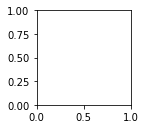

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(encoded_imgs[:,i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[:,i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [138]:
history = pd.DataFrame(data= hist.history)
history.to_csv('PU_train_data.csv')
history.head()

loss      val_loss
0 -4.106254e+04 -1.279752e+05
1 -2.972636e+05 -5.121918e+05
2 -7.927149e+05 -1.119037e+06
3 -1.487743e+06 -1.906267e+06
4 -2.349472e+06 -2.851650e+06

In [141]:
hist

In [139]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = hist.epoch, y = hist.history['loss'],
                    mode='lines+markers',
                    name='Train Loss'))
fig.add_trace(go.Scatter(x = hist.epoch, y = hist.history['mean_squared_logarithmic_error'],
                    mode='lines+markers',
                    name='Train Accuracy'))


fig.show()




KeyError: 'mean_squared_logarithmic_error'

In [35]:
len(decoded_imgs)

41480

In [74]:
decode=decoded_imgs.reshape(610,340,-1)

TypeError: Invalid shape (610, 340, 103) for image data

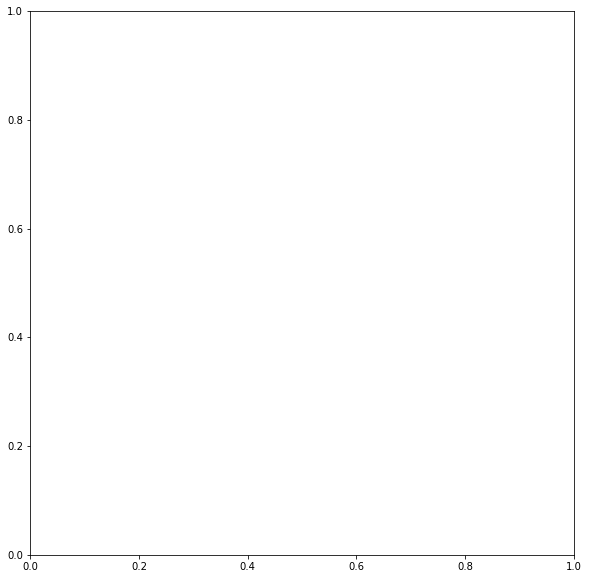

In [111]:
plot_data(decoded_imgs.reshape((610,340,-1)))

In [29]:
decoded_imgs.shape

(41480, 103)

In [37]:
decode.shape

(244, 170, 103)

In [42]:
x_train.shape

(165920, 103)

In [40]:
train=x_train.reshape(244,170,103)

ValueError: cannot reshape array of size 17089760 into shape (244,170,103)

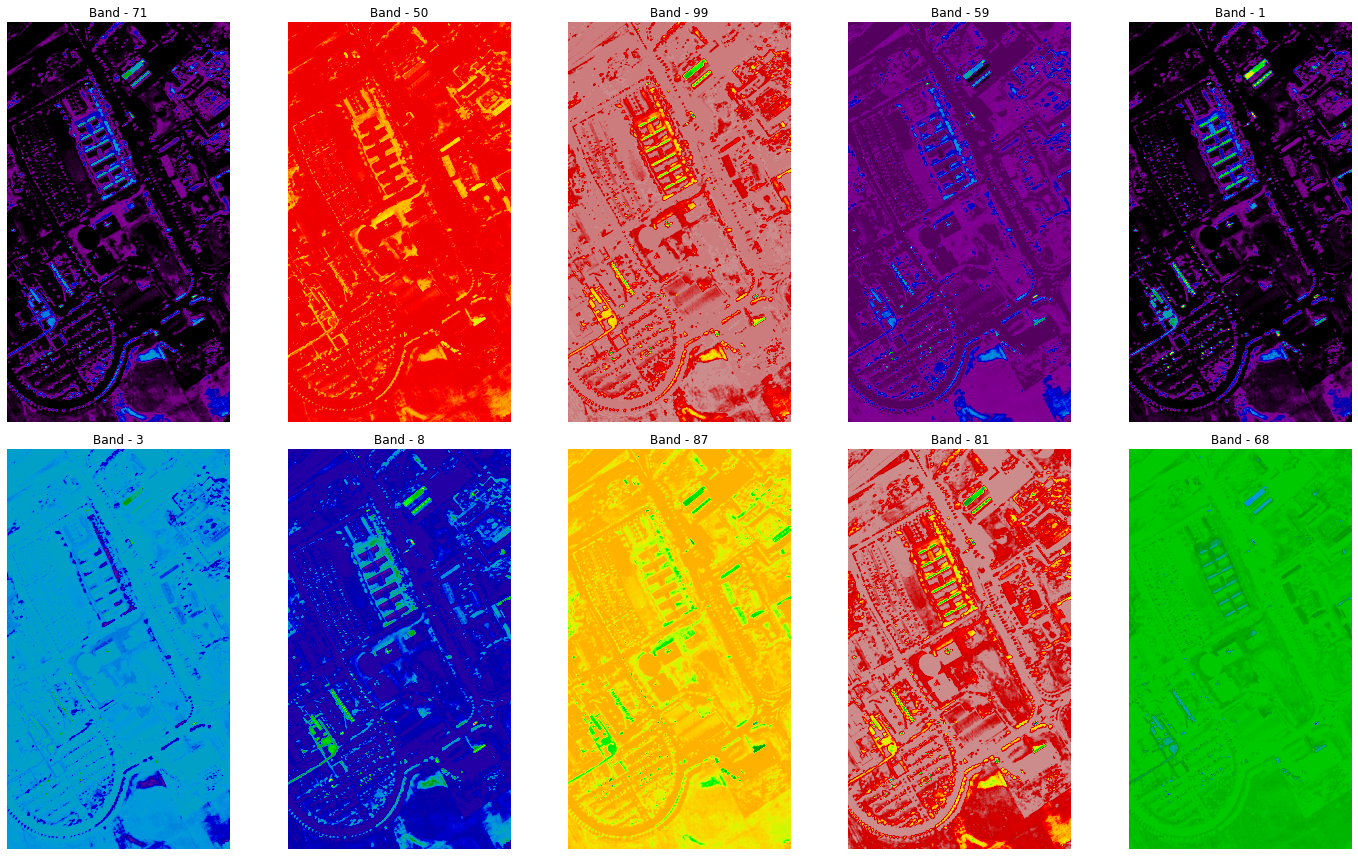

In [75]:
%matplotlib inline
fig=plt.figure(figsize=(20,12))

ax=fig.subplots(2,5)
for i in range(2):
    for j in range(5):
        c= np.random.randint(103)
        ax[i][j].imshow(decode[:,:,c], cmap='nipy_spectral')
        ax[i][j].axis('off')
        ax[i][j].title.set_text(f"Band - {c}")
        c+=1

plt.tight_layout()
      

In [ ]:
# Seperate encoder part from the auto encoder model

encoder = Model(inputs = input_dim, outputs = encoded7)

# encoded_input = Input(shape = (encoding_dim, ))

encoder.summary()


In [183]:
res_df = df[df['class'] != 0]
res_df.shape

(42776, 104)

In [184]:
X = res_df.iloc[:, :-1].values
y = res_df.iloc[:, -1].values

X.shape, y.shape

((42776, 103), (42776,))

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.70, stratify = y.ravel())
print(f"X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train Shape: {y_train.shape} \ny_test Shape: {y_test.shape}" )

NameError: name 'y' is not defined

In [416]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred= knn.predict(X_test)

NameError: name 'X_train' is not defined

In [187]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           1       0.94      0.89      0.91      4642
           2       0.87      0.99      0.92     13055
           3       0.74      0.73      0.73      1469
           4       0.98      0.82      0.89      2145
           5       1.00      0.99      0.99       942
           6       0.91      0.54      0.68      3520
           7       0.81      0.85      0.83       931
           8       0.81      0.86      0.83      2577
           9       1.00      1.00      1.00       663

    accuracy                           0.88     29944
   macro avg       0.89      0.85      0.87     29944
weighted avg       0.88      0.88      0.87     29944



In [193]:
res_df.iloc[:, -1]

91        1
92        1
93        1
94        1
95        1
         ..
207341    2
207342    2
207343    2
207344    2
207345    2
Name: class, Length: 42776, dtype: uint8

In [218]:
df1.iloc[:42776,:]

0    1             2             3             4    5   \
0      17621.273438  0.0  17620.982422  17626.128906  17630.882812  0.0   
1      17100.146484  0.0  17099.966797  17098.988281  17107.910156  0.0   
2      22721.921875  0.0  22720.525391  22722.246094  22731.066406  0.0   
3      18557.957031  0.0  18556.505859  18560.150391  18566.257812  0.0   
4      16105.395508  0.0  16103.502930  16106.368164  16111.770508  0.0   
...             ...  ...           ...           ...           ...  ...   
42771  30021.080078  0.0  30020.566406  30020.773438  30034.689453  0.0   
42772  10550.673828  0.0  10550.326172  10553.530273  10558.356445  0.0   
42773  13446.479492  0.0  13445.873047  13447.867188  13452.360352  0.0   
42774  16117.963867  0.0  16118.096680  16117.176758  16125.636719  0.0   
42775  17525.806641  0.0  17525.851562  17530.390625  17535.634766  0.0   

                 6             7             8             9   ...   50  \
0      17644.785156  17641.816406  17617.933594  17621.251953  ...  0.0   
1      17117.416016  17112.392578  17103.021484  17104.498047  ...  0.0   
2      22747.580078  22741.685547  22721.742188  22723.611328  ...  0.0   
3      18580.431641  18576.757812  18555.537109  18557.880859  ...  0.0   
4      16124.568359  16120.580078  16103.364258  16105.237305  ...  0.0   
...             ...           ...           ...           ...  ...  ...   
42771  30054.525391  30041.773438  30026.605469  30028.804688  ...  0.0   
42772  10564.038086  10564.560547  10547.197266  10551.162109  ...  0.0   
42773  13462.772461  13460.627930  13444.710938  13446.466797  ...  0.0   
42774  16135.347656  16129.844727  16120.558594  16122.027344  ...  0.0   
42775  17549.095703  17546.099609  17523.322266  17526.207031  ...  0.0   

                 51            52            53            54            55  \
0      17616.726562  17474.310547  17642.365234  17613.652344  17613.058594   
1      17096.605469  16958.757812  17115.783203  17096.369141  17090.021484   
2      22714.564453  22531.062500  22743.050781  22712.250000  22708.220703   
3      18551.087891  18401.523438  18576.816406  18549.371094  18547.613281   
4      16099.857422  15969.060547  16121.511719  16097.730469  16096.259766   
...             ...           ...           ...           ...           ...   
42771  30013.966797  29770.937500  30048.257812  30014.607422  30002.810547   
42772  10547.204102  10464.375000  10564.611328  10545.863281  10546.009766   
42773  13442.639648  13334.001953  13461.007812  13440.074219  13439.335938   
42774  16114.550781  15984.317383  16133.131836  16114.401367  16108.381836   
42775  17521.603516  17380.269531  17546.736328  17518.892578  17517.953125   

                 56            57            58            59  
0      17631.300781  17614.927734  17626.412109  17620.986328  
1      17108.785156  17088.164062  17108.189453  17098.828125  
2      22733.804688  22708.347656  22729.482422  22718.890625  
3      18567.361328  18548.679688  18563.306641  18555.597656  
4      16113.479492  16096.695312  16110.276367  16103.468750  
...             ...           ...           ...           ...  
42771  30037.886719  29999.869141  30035.945312  30017.716797  
42772  10556.181641  10547.641602  10553.151367  10550.353516  
42773  13453.606445  13440.299805  13450.034180  13445.564453  
42774  16126.325195  16106.795898  16125.683594  16116.876953  
42775  17536.205078  17519.732422  17531.074219  17525.419922  

[42776 rows x 60 columns]

In [219]:
res = df1.iloc[:42776,:]
res.shape

(42776, 60)

In [220]:
X1 = res.iloc[:, :].values
y1 = res_df.iloc[:, -1].values

X1.shape, y1.shape

((42776, 60), (42776,))

In [222]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, 
                                                    test_size=0.70, stratify = y.ravel())
print(f"X_train Shape: {X_train1.shape}\nX_test Shape: {X_test1.shape}\ny_train Shape: {y_train1.shape} \ny_test Shape: {y_test1.shape}" )

X_train Shape: (12832, 60)
X_test Shape: (29944, 60)
y_train Shape: (12832,) 
y_test Shape: (29944,)


In [223]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train1, y_train1)
knn_pred= knn.predict(X_test1)

In [224]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           1       0.16      0.14      0.15      4642
           2       0.44      0.81      0.57     13055
           3       0.03      0.00      0.01      1469
           4       0.06      0.01      0.01      2145
           5       0.00      0.00      0.00       942
           6       0.11      0.03      0.04      3520
           7       0.05      0.00      0.00       931
           8       0.09      0.01      0.02      2577
           9       0.00      0.00      0.00       663

    accuracy                           0.38     29944
   macro avg       0.10      0.11      0.09     29944
weighted avg       0.24      0.38      0.28     29944



In [166]:
encoded_imgs.mean()

15842.634

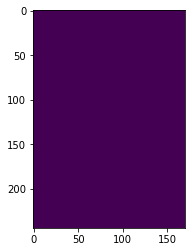

In [418]:
 plt.imshow(img[:,:,6])

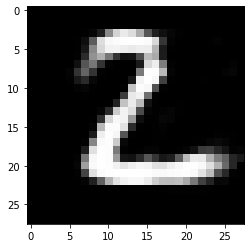

In [99]:
plt.imshow(decoded_imgs[1].reshape(28, 28))

In [100]:
import cv2

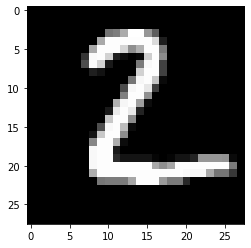

In [101]:
img=plt.imshow(x_test[1].reshape(28, 28))
plt.savefig('img1.png')

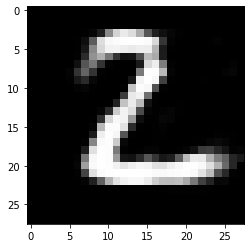

In [102]:
img1=plt.imshow(decoded_imgs[1].reshape(28, 28))
plt.savefig('img2.png')

In [103]:
img1=cv2.imread('img1.png')
img2=cv2.imread('img2.png')

In [104]:
psnr=cv2.PSNR(img1,img2)
psnr

23.390549070171282

In [105]:
from math import log10, sqrt 
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

psnr=PSNR(img1,img2)
psnr

39.218363435704504

In [106]:
mse = mean_squared_error(img1, img2)
ssim = ssim(img1, img2, data_range=img1.max() - img2.min(),multichannel=True)
print(mse,'\n',ssim)

297.8691004372428 
 0.9354180453833149


In [8]:
import tensorflow.keras as keras
from tensorflow.keras import layers
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

In [9]:
from tensorflow.keras import regularizers

In [25]:
encoded = layers.Dense(encode_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded=layers.Dense(103,activation='sigmoid')(encoded)

In [27]:
autoencoder= keras.Model(input_img,decoded)

In [28]:
encoder=keras.Model(input_img,encoded)
encoded_input=keras.Input(shape=(encode_dim,))
decoded_layer=autoencoder.layers[-1]
decoder=keras.Model(encoded_input,decoded_layer(encoded_input))

In [29]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [19]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train,_),(x_test,_)=data

ValueError: too many values to unpack (expected 2)

In [50]:
print(x_train.shape)
print(x_test.shape)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [442]:
x_test.shape, x_test.shape

((41480, 103), (41480, 103))

In [30]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/100
608/608 [==============================] - 7s 9ms/step - loss: -2508814080.0000 - val_loss: -7928647168.0000
Epoch 2/100
608/608 [==============================] - 10s 17ms/step - loss: -18414667776.0000 - val_loss: -31453569024.0000
Epoch 3/100
608/608 [==============================] - 4s 7ms/step - loss: -48220504064.0000 - val_loss: -67710042112.0000
Epoch 4/100
608/608 [==============================] - 5s 8ms/step - loss: -89973219328.0000 - val_loss: -115123937280.0000
Epoch 5/100
608/608 [==============================] - 5s 9ms/step - loss: -141964148736.0000 - val_loss: -172156272640.0000
Epoch 6/100
608/608 [==============================] - 6s 11ms/step - loss: -203036557312.0000 - val_loss: -237901578240.0000
Epoch 7/100
608/608 [==============================] - 6s 10ms/step - loss: -273205264384.0000 - val_loss: -313604112384.0000
Epoch 8/100
608/608 [==============================] - 4s 7ms/step - loss: -352845299712.0000 - val_loss: -397882490880.0000
Epoch

608/608 [==============================] - 5s 8ms/step - loss: -17379494985728.0000 - val_loss: -17739693424640.0000
Epoch 66/100
608/608 [==============================] - 5s 9ms/step - loss: -17890256355328.0000 - val_loss: -18257195040768.0000
Epoch 67/100
608/608 [==============================] - 5s 9ms/step - loss: -18408028504064.0000 - val_loss: -18781562732544.0000
Epoch 68/100
608/608 [==============================] - 4s 7ms/step - loss: -18932851277824.0000 - val_loss: -19313067032576.0000
Epoch 69/100
608/608 [==============================] - 6s 9ms/step - loss: -19464877768704.0000 - val_loss: -19851993153536.0000
Epoch 70/100
608/608 [==============================] - 5s 9ms/step - loss: -20004208640000.0000 - val_loss: -20398129283072.0000
Epoch 71/100
608/608 [==============================] - 5s 8ms/step - loss: -20550682411008.0000 - val_loss: -20951563501568.0000
Epoch 72/100
608/608 [==============================] - 5s 9ms/step - loss: -21104257138688.0000 - val_

In [31]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [40]:
encoded_imgs[i].reshape(305,170,60)

ValueError: cannot reshape array of size 60 into shape (305,170,60)

In [48]:
x_test

band1  band2  band3  band4  band5  band6  band7  band8  band9  band10  \
199772    391    503    512    343    253    337    374    414    418     364   
14209    1269   1229   1072   1039   1044   1060   1087   1141   1219    1220   
94987     948    838    871    846    873    935    875    842    884     818   
8480      497    145    116    244    302    371    472    548    583     589   
184206    183    141    312    494    455    475    479    458    497     498   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
137688    818    566    590    616    624    637    646    596    485     439   
67340    1300   1144   1106   1252   1285   1220   1168   1163   1219    1255   
106668   1284   1141    748    635    759   1007   1184   1189   1122    1087   
204959    828    912    849    818    867    891    906    793    724     814   
151743   1138    973    860    756    752    728    629    551    592     657   

        ...  band94  band95  band96  band97  band98  band99  band100  band101  \
199772  ...    2840    2864    2855    2851    2859    2857     2814     2791   
14209   ...    1258    1271    1283    1280    1322    1330     1270     1215   
94987   ...    2605    2620    2609    2595    2599    2563     2555     2587   
8480    ...    2676    2685    2675    2664    2680    2685     2706     2703   
184206  ...    2136    2158    2194    2195    2186    2175     2174     2167   
...     ...     ...     ...     ...     ...     ...     ...      ...      ...   
137688  ...    2737    2714    2720    2735    2751    2741     2696     2674   
67340   ...    1514    1546    1519    1481    1476    1507     1526     1524   
106668  ...    1415    1424    1432    1440    1434    1420     1393     1384   
204959  ...    2671    2656    2658    2694    2695    2648     2651     2660   
151743  ...     665     675     697     700     694     669      651      653   

        band102  band103  
199772     2813     2852  
14209      1203     1205  
94987      2612     2648  
8480       2718     2734  
184206     2163     2147  
...         ...      ...  
137688     2695     2782  
67340      1520     1490  
106668     1382     1396  
204959     2665     2676  
151743      658      648  

[51850 rows x 103 columns]

In [49]:
img=encoded_imgs.reshape(305,170,60)

In [51]:
img[i].shape

(170, 60)

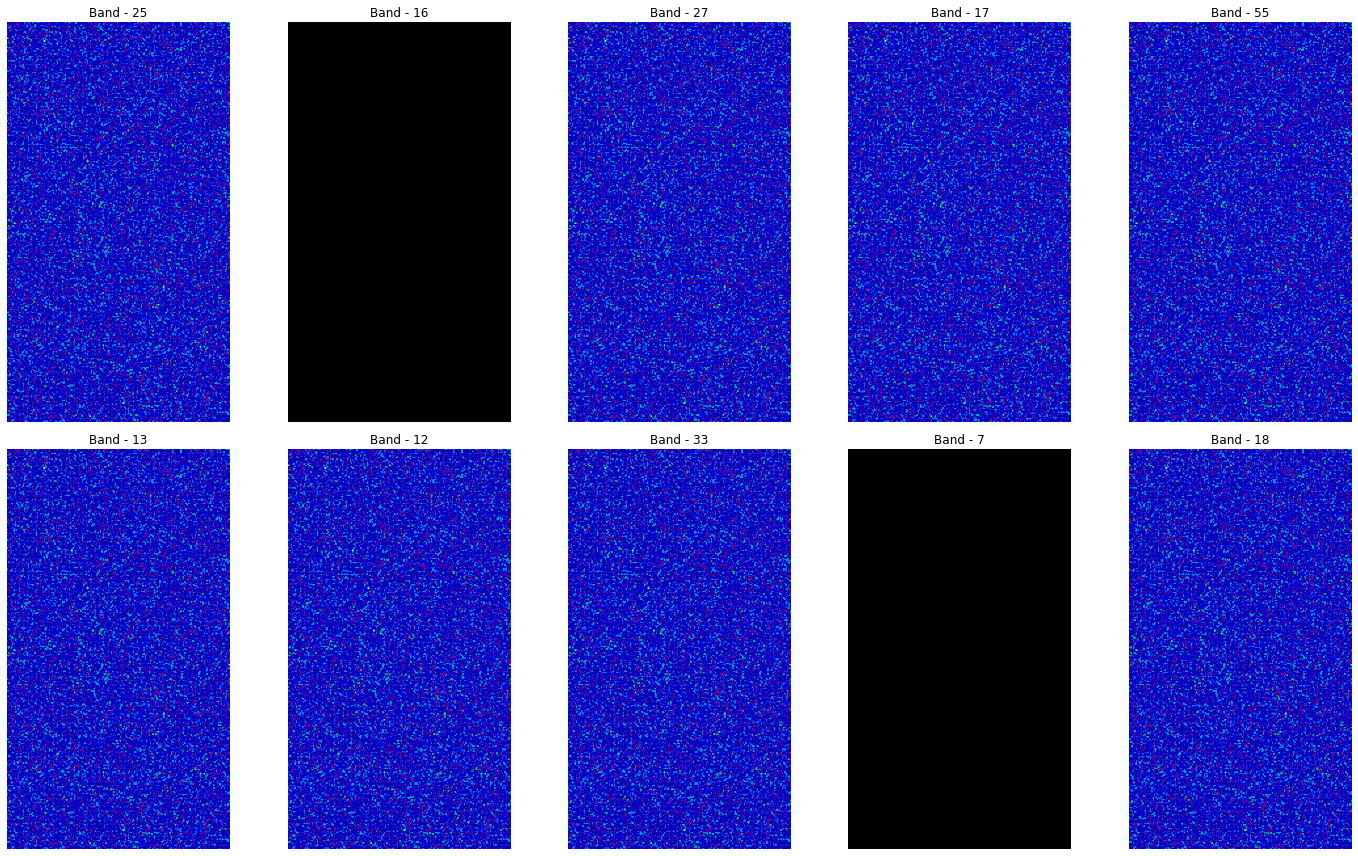

In [52]:
%matplotlib inline
fig=plt.figure(figsize=(20,12))

ax=fig.subplots(2,5)
for i in range(2):
    for j in range(5):
        c= np.random.randint(60)
        ax[i][j].imshow(img[:,:,c], cmap='nipy_spectral')
        ax[i][j].axis('off')
        ax[i][j].title.set_text(f"Band - {c}")
        c+=1

plt.tight_layout()
      

In [12]:
# encoder dimension
encoding_dim = 60

input_dim = Input(shape = (ncol, ), name = 'InputLayer')

# Encoder Layers
encoded1 = Dense(100, activation = 'relu', name = 'EncodeLayer1')(input_dim)
encoded2 = Dense(90, activation = 'relu', name = 'EncodeLayer2')(encoded1)
encoded3 = Dense(85, activation = 'relu', name = 'EncodeLayer3')(encoded2)
encoded4 = Dense(80, activation = 'relu', name = 'EncodeLayer4')(encoded3)
encoded5 = Dense(75, activation = 'relu', name = 'EncodeLayer5')(encoded4)
encoded6 = Dense(70, activation = 'relu', name = 'EncodeLayer6')(encoded5)

# Coded Part
encoded7 = Dense(encoding_dim, activation = 'linear', name = 'CodeLayer')(encoded6)

# Decoder Layers
decoded1 = Dense(70, activation = 'relu', name = 'DecodeLayer1')(encoded7)
decoded2 = Dense(75, activation = 'relu', name = 'DecodeLayer2')(decoded1)
decoded3 = Dense(80, activation = 'relu', name = 'DecodeLayer3')(decoded2)
decoded4 = Dense(85, activation = 'relu', name = 'DecodeLayer4')(decoded3)
decoded5 = Dense(90, activation = 'relu', name = 'DecodeLayer5')(decoded4)
decoded6 = Dense(100, activation = 'relu', name = 'DecodeLayer6')(decoded5)
decoded7 = Dense(ncol, activation = 'sigmoid', name = 'OutputLayer')(decoded6)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded7)

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 103)]             0         
                                                                 
 EncodeLayer1 (Dense)        (None, 100)               10400     
                                                                 
 EncodeLayer2 (Dense)        (None, 90)                9090      
                                                                 
 EncodeLayer3 (Dense)        (None, 85)                7735      
                                                                 
 EncodeLayer4 (Dense)        (None, 80)                6880      
                                                                 
 EncodeLayer5 (Dense)        (None, 75)                6075      
                                                                 
 EncodeLayer6 (Dense)        (None, 70)                5320  

In [13]:
# Compile the Model

autoencoder.compile(optimizer = 'adam', 
                    loss = 'mse', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'Pavia_University_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = autoencoder.fit(X_scaled, 
                       X_scaled, 
                       epochs = 50, 
                       batch_size = 256 , 
                       shuffle = True, 
                       callbacks=[early_stop,
                                  checkpoint,
                                  tensorboard])

Epoch 1/50
811/811 [==============================] - 5s 5ms/step - loss: 0.0037 - mean_squared_logarithmic_error: 0.0024
Epoch 2/50
811/811 [==============================] - 4s 5ms/step - loss: 1.1596e-04 - mean_squared_logarithmic_error: 7.8556e-05
Epoch 3/50
811/811 [==============================] - 6s 8ms/step - loss: 9.0845e-05 - mean_squared_logarithmic_error: 6.2208e-05
Epoch 4/50
811/811 [==============================] - 6s 7ms/step - loss: 9.3121e-05 - mean_squared_logarithmic_error: 6.3579e-05
Epoch 5/50
811/811 [==============================] - 6s 7ms/step - loss: 8.2242e-05 - mean_squared_logarithmic_error: 5.6746e-05
Epoch 6/50
811/811 [==============================] - 7s 8ms/step - loss: 8.2935e-05 - mean_squared_logarithmic_error: 5.7240e-05
Epoch 7/50
811/811 [==============================] - 6s 8ms/step - loss: 7.1688e-05 - mean_squared_logarithmic_error: 4.8715e-05
Epoch 8/50
811/811 [==============================] - 6s 8ms/step - loss: 6.4497e-05 - mean_square

In [14]:
# encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(X_scaled)

In [15]:
decoded_imgs.shape

(207400, 103)

In [16]:
decode=decoded_imgs.reshape(610,340,-1)

In [19]:
decode.shape

(610, 340, 103)

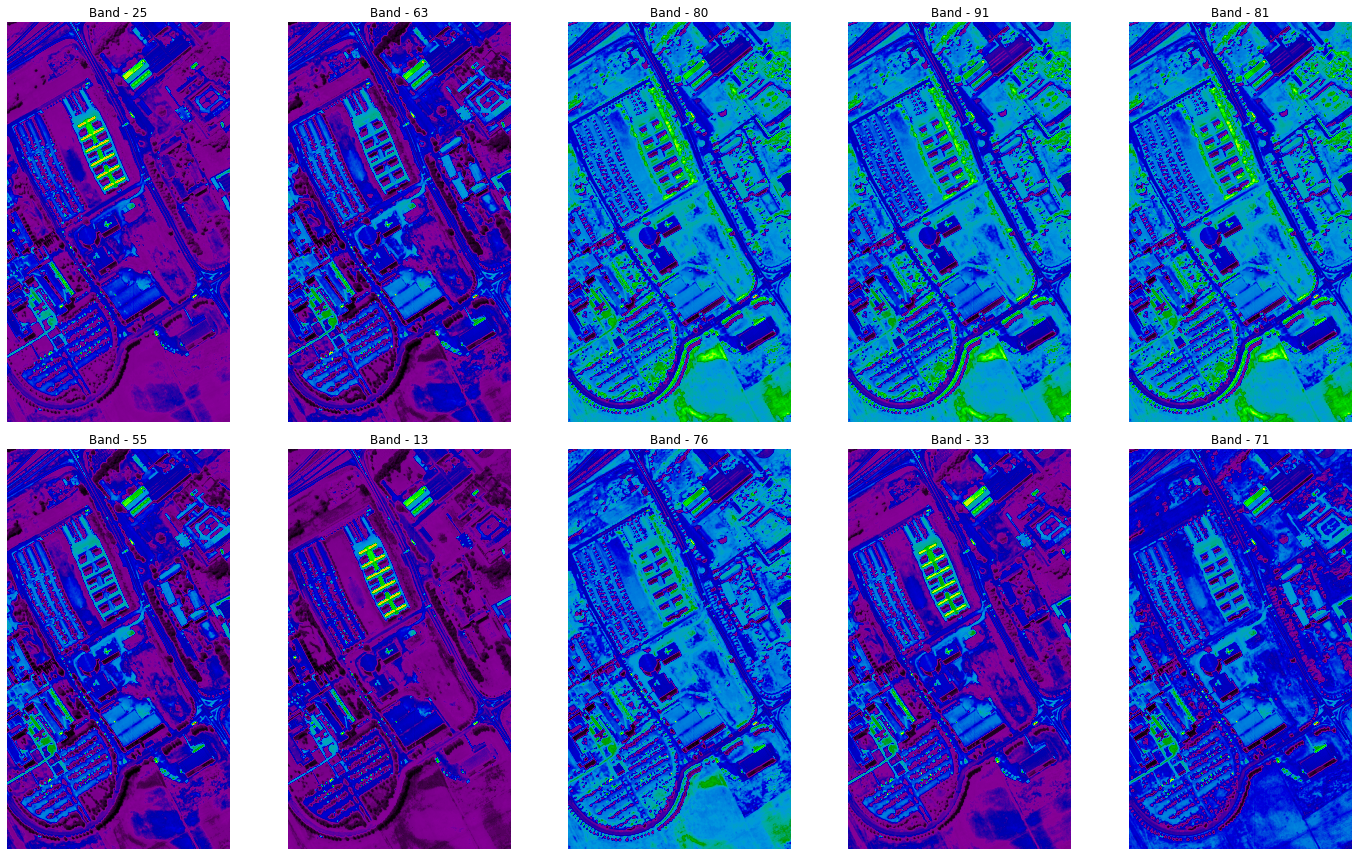

In [20]:
%matplotlib inline
fig=plt.figure(figsize=(20,12))

ax=fig.subplots(2,5)
for i in range(2):
    for j in range(5):
        c= np.random.randint(103)
        ax[i][j].imshow(decode[:, :, c], cmap='nipy_spectral')
        ax[i][j].axis('off')
        ax[i][j].title.set_text(f"Band - {c}")
        c+=1

plt.tight_layout()
      

In [35]:
decode.shape

(610, 340, 103)

In [34]:
data.shape

(610, 340, 103)

In [28]:
def custom_loss(Y_true, Y_pred):
    PSNR = tf.image.psnr(Y_true, Y_pred, max_val = 255)
    return PSNR

In [39]:
data.dtype

dtype('<u2')

In [40]:
decode.dtype

dtype('float32')

In [41]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  

In [42]:
psnr=PSNR(data,decode)
psnr

-16.23842709205422

In [43]:
from skimage.metrics import structural_similarity 
data1 = np.squeeze(data)
data2 = np.squeeze(decode)
x=structural_similarity(data1,data2)
x

C:\Users\KIIT\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  after removing the cwd from sys.path.


0.27588910908476166

In [37]:
print(custom_loss(data,decode))

tf.Tensor(-33.22718, shape=(), dtype=float32)


In [9]:
history = pd.DataFrame(data= hist.history)

history.to_csv('PU_AE_train_data.csv')

history.head()


loss  mean_squared_logarithmic_error
0  0.003693                        0.002328
1  0.000117                        0.000080
2  0.000091                        0.000062
3  0.000089                        0.000061
4  0.000087                        0.000060

In [10]:
# Get the data with the reduced dimesion

autoencoded = pd.DataFrame(autoencoder.predict(X_scaled))

autoencoded = autoencoded.add_prefix('feature_')

# Add the class labels for classification purposes

autoencoded['class'] = df.loc[:,['class']]

autoencoded.head()



feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.081785   0.065475   0.052380   0.044618   0.041171   0.038108   
1   0.076824   0.062598   0.055478   0.051757   0.050276   0.046849   
2   0.097940   0.078839   0.062317   0.050839   0.045083   0.040145   
3   0.097902   0.075974   0.052391   0.038720   0.033604   0.029966   
4   0.087197   0.068030   0.050311   0.040507   0.037294   0.034359   

   feature_6  feature_7  feature_8  feature_9  ...  feature_94  feature_95  \
0   0.035976   0.032786   0.030223   0.028378  ...    0.425995    0.422435   
1   0.044277   0.040713   0.037377   0.035546  ...    0.327362    0.322814   
2   0.037448   0.034199   0.031346   0.029243  ...    0.288882    0.286274   
3   0.027614   0.024561   0.022524   0.020984  ...    0.336834    0.332384   
4   0.032048   0.028971   0.026969   0.025490  ...    0.303967    0.299624   

   feature_96  feature_97  feature_98  feature_99  feature_100  feature_101  \
0    0.406661    0.403594    0.399984    0.397747     0.407402     0.395756   
1    0.306246    0.305451    0.300581    0.298168     0.309051     0.293635   
2    0.272971    0.272799    0.269438    0.269391     0.281583     0.269167   
3    0.318970    0.317186    0.312947    0.312180     0.324484     0.311062   
4    0.286638    0.284980    0.281502    0.280320     0.292264     0.279508   

   feature_102  class  
0     0.409933      0  
1     0.308896      0  
2     0.288266      0  
3     0.328855      0  
4     0.296230      0  

[5 rows x 104 columns]

In [11]:
ae_df=autoencoded
ae_df.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.081785   0.065475   0.052380   0.044618   0.041171   0.038108   
1   0.076824   0.062598   0.055478   0.051757   0.050276   0.046849   
2   0.097940   0.078839   0.062317   0.050839   0.045083   0.040145   
3   0.097902   0.075974   0.052391   0.038720   0.033604   0.029966   
4   0.087197   0.068030   0.050311   0.040507   0.037294   0.034359   

   feature_6  feature_7  feature_8  feature_9  ...  feature_94  feature_95  \
0   0.035976   0.032786   0.030223   0.028378  ...    0.425995    0.422435   
1   0.044277   0.040713   0.037377   0.035546  ...    0.327362    0.322814   
2   0.037448   0.034199   0.031346   0.029243  ...    0.288882    0.286274   
3   0.027614   0.024561   0.022524   0.020984  ...    0.336834    0.332384   
4   0.032048   0.028971   0.026969   0.025490  ...    0.303967    0.299624   

   feature_96  feature_97  feature_98  feature_99  feature_100  feature_101  \
0    0.406661    0.403594    0.399984    0.397747     0.407402     0.395756   
1    0.306246    0.305451    0.300581    0.298168     0.309051     0.293635   
2    0.272971    0.272799    0.269438    0.269391     0.281583     0.269167   
3    0.318970    0.317186    0.312947    0.312180     0.324484     0.311062   
4    0.286638    0.284980    0.281502    0.280320     0.292264     0.279508   

   feature_102  class  
0     0.409933      0  
1     0.308896      0  
2     0.288266      0  
3     0.328855      0  
4     0.296230      0  

[5 rows x 104 columns]

In [13]:
ae_df.shape

(207400, 104)

In [12]:
res_df = ae_df[ae_df['class'] != 0]
res_df.shape

(42776, 104)

In [14]:
X = res_df.iloc[:, :-1].values
y = res_df.iloc[:, -1].values

X.shape, y.shape

((42776, 103), (42776,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.70, stratify = y.ravel())
print(f"X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train Shape: {y_train.shape} \ny_test Shape: {y_test.shape}" )

X_train Shape: (12832, 103)
X_test Shape: (29944, 103)
y_train Shape: (12832,) 
y_test Shape: (29944,)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred= knn.predict(X_test)

In [17]:
print(f"Accuracy: {accuracy_score(y_test,knn_pred)*100}\n")

Accuracy: 85.37269569863746



In [18]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           1       0.91      0.88      0.89      4642
           2       0.85      0.98      0.91     13055
           3       0.66      0.67      0.66      1469
           4       0.95      0.81      0.88      2145
           5       0.99      0.99      0.99       942
           6       0.85      0.45      0.59      3520
           7       0.76      0.78      0.77       931
           8       0.80      0.82      0.81      2577
           9       1.00      1.00      1.00       663

    accuracy                           0.85     29944
   macro avg       0.86      0.82      0.83     29944
weighted avg       0.86      0.85      0.85     29944



In [19]:
from tqdm.notebook import tqdm

def predict_class(df, cls, name=None):
    if name!='lgb':
        pred = [0 if df.iloc[i, :][-1] == 0 else cls.predict(df.iloc[i, :][:-1].values.reshape(1,-1))[0]
          for i in tqdm(range(df.shape[0]))]
    else:
        pred = [0 if df.iloc[i, :][-1] == 0 else np.argmax(cls.predict(df.iloc[i, :][:-1].values.reshape(1,-1)), axis=1)[0]
          for i in tqdm(range(df.shape[0]))]
    return np.array(pred)

In [20]:
pred=predict_class(ae_df,knn)

  0%|          | 0/207400 [00:00<?, ?it/s]

In [21]:
print(accuracy_score(ae_df['class'].values, pred)*100)

97.09836065573771


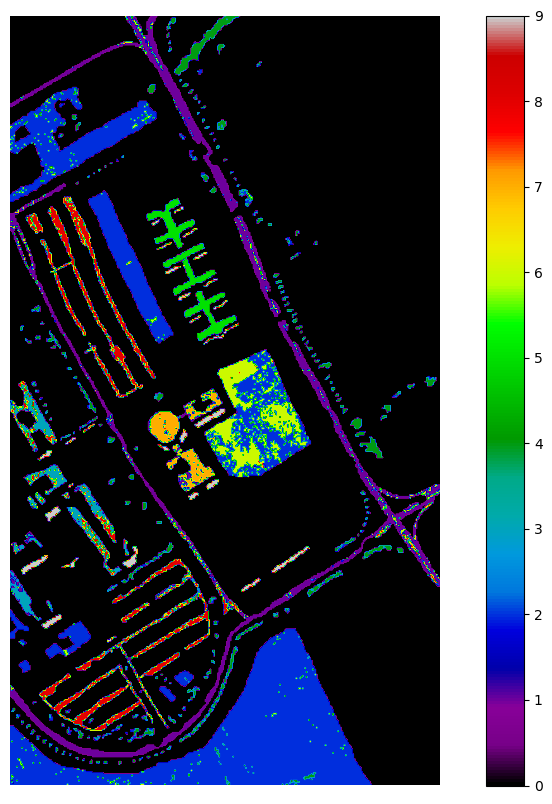

In [23]:
plot_data(pred.reshape(610,340))

In [24]:
# encoder dimension
encoding_dim = 60

input_dim = Input(shape = (ncol, ), name = 'InputLayer')

# Encoder Layers
encoded1 = Dense(100, activation = 'relu', name = 'EncodeLayer1')(input_dim)
encoded2 = Dense(90, activation = 'relu', name = 'EncodeLayer2')(encoded1)
encoded3 = Dense(85, activation = 'relu', name = 'EncodeLayer3')(encoded2)
encoded4 = Dense(80, activation = 'relu', name = 'EncodeLayer4')(encoded3)
encoded5 = Dense(75, activation = 'relu', name = 'EncodeLayer5')(encoded4)
encoded6 = Dense(70, activation = 'tanh', name = 'EncodeLayer6')(encoded5)

# Coded Part
encoded7 = Dense(encoding_dim, activation = 'linear', name = 'CodeLayer')(encoded6)

# Decoder Layers
decoded1 = Dense(70, activation = 'relu', name = 'DecodeLayer1')(encoded7)
decoded2 = Dense(75, activation = 'relu', name = 'DecodeLayer2')(decoded1)
decoded3 = Dense(80, activation = 'relu', name = 'DecodeLayer3')(decoded2)
decoded4 = Dense(85, activation = 'relu', name = 'DecodeLayer4')(decoded3)
decoded5 = Dense(90, activation = 'relu', name = 'DecodeLayer5')(decoded4)
decoded6 = Dense(100, activation = 'relu', name = 'DecodeLayer6')(decoded5)
decoded7 = Dense(ncol, activation = 'tanh', name = 'OutputLayer')(decoded6)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded7)

autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      [(None, 103)]             0         
_________________________________________________________________
EncodeLayer1 (Dense)         (None, 100)               10400     
_________________________________________________________________
EncodeLayer2 (Dense)         (None, 90)                9090      
_________________________________________________________________
EncodeLayer3 (Dense)         (None, 85)                7735      
_________________________________________________________________
EncodeLayer4 (Dense)         (None, 80)                6880      
_________________________________________________________________
EncodeLayer5 (Dense)         (None, 75)                6075      
_________________________________________________________________
EncodeLayer6 (Dense)         (None, 70)                5320

In [25]:
# Compile the Model

autoencoder.compile(optimizer = 'adam', 
                    loss = 'mse', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'Pavia_University_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = autoencoder.fit(X_scaled, 
                       X_scaled, 
                       epochs = 100, 
                       batch_size = 256 , 
                       shuffle = True, 
                       callbacks=[early_stop,
                                  checkpoint,
                                  tensorboard])

Epoch 1/100
811/811 [==============================] - 15s 17ms/step - loss: 0.0011 - mean_squared_logarithmic_error: 7.1943e-04
Epoch 2/100
811/811 [==============================] - 11s 13ms/step - loss: 9.5101e-05 - mean_squared_logarithmic_error: 6.4726e-05
Epoch 3/100
811/811 [==============================] - 10s 12ms/step - loss: 8.4725e-05 - mean_squared_logarithmic_error: 5.8103e-05
Epoch 4/100
811/811 [==============================] - 9s 11ms/step - loss: 7.2913e-05 - mean_squared_logarithmic_error: 4.9849e-05
Epoch 5/100
811/811 [==============================] - 10s 12ms/step - loss: 6.3804e-05 - mean_squared_logarithmic_error: 4.4038e-05
Epoch 6/100
811/811 [==============================] - 9s 11ms/step - loss: 5.5080e-05 - mean_squared_logarithmic_error: 3.8098e-05
Epoch 7/100
811/811 [==============================] - 9s 12ms/step - loss: 5.0298e-05 - mean_squared_logarithmic_error: 3.4716e-05
Epoch 8/100
811/811 [==============================] - 11s 14ms/step - loss:

In [26]:
history = pd.DataFrame(data= hist.history)

history.to_csv('PU_AE_train_data.csv')

history.head()


loss  mean_squared_logarithmic_error
0  0.001088                        0.000719
1  0.000095                        0.000065
2  0.000085                        0.000058
3  0.000073                        0.000050
4  0.000064                        0.000044

In [27]:
# Get the data with the reduced dimesion

autoencoded = pd.DataFrame(autoencoder.predict(X_scaled))

autoencoded = autoencoded.add_prefix('feature_')

# Add the class labels for classification purposes

autoencoded['class'] = df.loc[:,['class']]

autoencoded.head()



feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.069940   0.055490   0.046788   0.041749   0.037194   0.039169   
1   0.071828   0.061992   0.057197   0.053908   0.048238   0.046091   
2   0.083736   0.066605   0.051215   0.043999   0.040186   0.040406   
3   0.066440   0.060365   0.059121   0.053753   0.045072   0.041530   
4   0.070010   0.057345   0.048622   0.044407   0.039680   0.039279   

   feature_6  feature_7  feature_8  feature_9  ...  feature_94  feature_95  \
0   0.039796   0.037746   0.035151   0.032541  ...    0.431429    0.427070   
1   0.045025   0.042911   0.039498   0.037258  ...    0.334511    0.331626   
2   0.038898   0.037951   0.034925   0.032027  ...    0.286475    0.285796   
3   0.039698   0.036503   0.031879   0.029143  ...    0.340856    0.335909   
4   0.039582   0.037396   0.033511   0.031660  ...    0.307809    0.304943   

   feature_96  feature_97  feature_98  feature_99  feature_100  feature_101  \
0    0.412097    0.406978    0.403500    0.402125     0.411955     0.403793   
1    0.314515    0.312796    0.308390    0.308360     0.317765     0.307372   
2    0.272314    0.271879    0.270148    0.270833     0.284928     0.275106   
3    0.321476    0.319665    0.317376    0.316619     0.328682     0.319293   
4    0.290046    0.291446    0.289945    0.290619     0.302825     0.294075   

   feature_102  class  
0     0.414849      0  
1     0.320235      0  
2     0.288152      0  
3     0.330962      0  
4     0.305334      0  

[5 rows x 104 columns]

In [28]:
ae_df=autoencoded
ae_df.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.069940   0.055490   0.046788   0.041749   0.037194   0.039169   
1   0.071828   0.061992   0.057197   0.053908   0.048238   0.046091   
2   0.083736   0.066605   0.051215   0.043999   0.040186   0.040406   
3   0.066440   0.060365   0.059121   0.053753   0.045072   0.041530   
4   0.070010   0.057345   0.048622   0.044407   0.039680   0.039279   

   feature_6  feature_7  feature_8  feature_9  ...  feature_94  feature_95  \
0   0.039796   0.037746   0.035151   0.032541  ...    0.431429    0.427070   
1   0.045025   0.042911   0.039498   0.037258  ...    0.334511    0.331626   
2   0.038898   0.037951   0.034925   0.032027  ...    0.286475    0.285796   
3   0.039698   0.036503   0.031879   0.029143  ...    0.340856    0.335909   
4   0.039582   0.037396   0.033511   0.031660  ...    0.307809    0.304943   

   feature_96  feature_97  feature_98  feature_99  feature_100  feature_101  \
0    0.412097    0.406978    0.403500    0.402125     0.411955     0.403793   
1    0.314515    0.312796    0.308390    0.308360     0.317765     0.307372   
2    0.272314    0.271879    0.270148    0.270833     0.284928     0.275106   
3    0.321476    0.319665    0.317376    0.316619     0.328682     0.319293   
4    0.290046    0.291446    0.289945    0.290619     0.302825     0.294075   

   feature_102  class  
0     0.414849      0  
1     0.320235      0  
2     0.288152      0  
3     0.330962      0  
4     0.305334      0  

[5 rows x 104 columns]

In [29]:
ae_df.shape

(207400, 104)

In [30]:
res_df = ae_df[ae_df['class'] != 0]
res_df.shape

(42776, 104)

In [31]:
X = res_df.iloc[:, :-1].values
y = res_df.iloc[:, -1].values

X.shape, y.shape

((42776, 103), (42776,))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.70, stratify = y.ravel())
print(f"X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train Shape: {y_train.shape} \ny_test Shape: {y_test.shape}" )

X_train Shape: (12832, 103)
X_test Shape: (29944, 103)
y_train Shape: (12832,) 
y_test Shape: (29944,)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred= knn.predict(X_test)

In [34]:
print(f"Accuracy: {accuracy_score(y_test,knn_pred)*100}\n")

Accuracy: 86.29107667646274



In [35]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           1       0.91      0.89      0.90      4642
           2       0.85      0.98      0.91     13055
           3       0.68      0.66      0.67      1469
           4       0.96      0.82      0.88      2145
           5       0.99      0.99      0.99       942
           6       0.88      0.48      0.62      3520
           7       0.80      0.77      0.78       931
           8       0.80      0.83      0.81      2577
           9       1.00      1.00      1.00       663

    accuracy                           0.86     29944
   macro avg       0.88      0.83      0.84     29944
weighted avg       0.87      0.86      0.85     29944



In [36]:
from tqdm.notebook import tqdm

def predict_class(df, cls, name=None):
    if name!='lgb':
        pred = [0 if df.iloc[i, :][-1] == 0 else cls.predict(df.iloc[i, :][:-1].values.reshape(1,-1))[0]
          for i in tqdm(range(df.shape[0]))]
    else:
        pred = [0 if df.iloc[i, :][-1] == 0 else np.argmax(cls.predict(df.iloc[i, :][:-1].values.reshape(1,-1)), axis=1)[0]
          for i in tqdm(range(df.shape[0]))]
    return np.array(pred)

In [37]:
pred=predict_class(ae_df,knn)

  0%|          | 0/207400 [00:00<?, ?it/s]

In [38]:
print(accuracy_score(ae_df['class'].values, pred)*100)

97.28495660559305


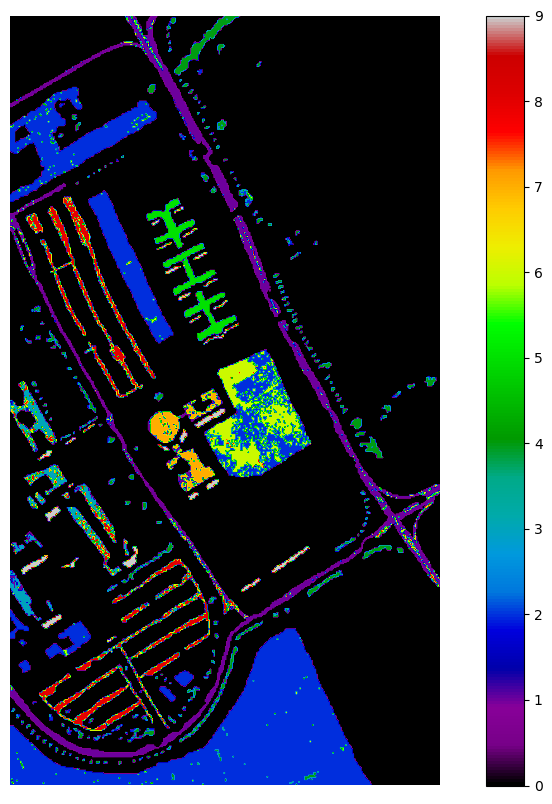

In [39]:
plot_data(pred.reshape(610,340))

In [112]:
# encoder dimension
encoding_dim = 60

input_dim = Input(shape = (ncol, ), name = 'InputLayer')

# Encoder Layers
encoded1 = Dense(100, activation = 'relu', name = 'EncodeLayer1')(input_dim)
encoded2 = Dense(90, activation = 'relu', name = 'EncodeLayer2')(encoded1)
encoded3 = Dense(85, activation = 'relu', name = 'EncodeLayer3')(encoded2)
encoded4 = Dense(80, activation = 'relu', name = 'EncodeLayer4')(encoded3)
encoded5 = Dense(75, activation = 'relu', name = 'EncodeLayer5')(encoded4)
encoded6 = Dense(70, activation = 'tanh', name = 'EncodeLayer6')(encoded5)

# Coded Part
encoded7 = Dense(encoding_dim, activation = 'linear', name = 'CodeLayer')(encoded6)

# Decoder Layers
decoded1 = Dense(70, activation = 'relu', name = 'DecodeLayer1')(encoded7)
decoded2 = Dense(75, activation = 'relu', name = 'DecodeLayer2')(decoded1)
decoded3 = Dense(80, activation = 'relu', name = 'DecodeLayer3')(decoded2)
decoded4 = Dense(85, activation = 'relu', name = 'DecodeLayer4')(decoded3)
decoded5 = Dense(90, activation = 'relu', name = 'DecodeLayer5')(decoded4)
decoded6 = Dense(100, activation = 'relu', name = 'DecodeLayer6')(decoded5)
decoded7 = Dense(ncol, activation = 'tanh', name = 'OutputLayer')(decoded6)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded7)

autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      [(None, 103)]             0         
_________________________________________________________________
EncodeLayer1 (Dense)         (None, 100)               10400     
_________________________________________________________________
EncodeLayer2 (Dense)         (None, 90)                9090      
_________________________________________________________________
EncodeLayer3 (Dense)         (None, 85)                7735      
_________________________________________________________________
EncodeLayer4 (Dense)         (None, 80)                6880      
_________________________________________________________________
EncodeLayer5 (Dense)         (None, 75)                6075      
_________________________________________________________________
EncodeLayer6 (Dense)         (None, 70)                5320

In [113]:
opt= tf.keras.optimizers.Adam(
    learning_rate=0.0000001,
    beta_1=0.09,
    beta_2=0.0999,
    epsilon=1e-09,
    amsgrad=True,
    name="Adam",
    
)

In [114]:
# Compile the Model

autoencoder.compile(optimizer = opt, 
                    loss = 'mse', 
                    metrics = [tf.keras.metrics.MeanSquaredLogarithmicError()]
                    ) 

# Callbacks

## Early Stopping
early_stop = EarlyStopping(monitor = 'mean_squared_logarithmic_error',
                            mode = 'min',
                            min_delta = 0,
                            patience = 5,
                            restore_best_weights = True)

## Checkpoint
checkpoint = ModelCheckpoint(filepath = 'Pavia_University_AE_Model.h5', 
                             monitor = 'mean_squared_logarithmic_error', 
                             mode ='min', 
                             save_best_only = True)

## Tensorboard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

# Fit the Model

hist = autoencoder.fit(X_scaled, 
                       X_scaled, 
                       epochs = 100, 
                       batch_size = 256 , 
                       shuffle = True, 
                       callbacks=[early_stop,
                                  checkpoint,
                                  tensorboard])

Epoch 1/100
811/811 [==============================] - 22s 24ms/step - loss: 0.0420 - mean_squared_logarithmic_error: 0.0314
Epoch 2/100
811/811 [==============================] - 12s 14ms/step - loss: 0.0419 - mean_squared_logarithmic_error: 0.0313
Epoch 3/100
811/811 [==============================] - 13s 16ms/step - loss: 0.0418 - mean_squared_logarithmic_error: 0.0313
Epoch 4/100
811/811 [==============================] - 14s 17ms/step - loss: 0.0418 - mean_squared_logarithmic_error: 0.0312
Epoch 5/100
811/811 [==============================] - 13s 16ms/step - loss: 0.0417 - mean_squared_logarithmic_error: 0.0312
Epoch 6/100
811/811 [==============================] - 12s 15ms/step - loss: 0.0416 - mean_squared_logarithmic_error: 0.0311
Epoch 7/100
811/811 [==============================] - 12s 14ms/step - loss: 0.0415 - mean_squared_logarithmic_error: 0.0311
Epoch 8/100
811/811 [==============================] - 14s 18ms/step - loss: 0.0414 - mean_squared_logarithmic_error: 0.0310


In [115]:
history = pd.DataFrame(data= hist.history)

# history.to_csv('PU_AE_train_data.csv')

history.head()


loss  mean_squared_logarithmic_error
0  0.042001                        0.031384
1  0.041915                        0.031338
2  0.041834                        0.031293
3  0.041757                        0.031246
4  0.041680                        0.031195

In [116]:
# encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(X_scaled)

In [117]:
decoded_imgs.shape

(207400, 103)

In [118]:
decode=decoded_imgs.reshape(610,340,-1)

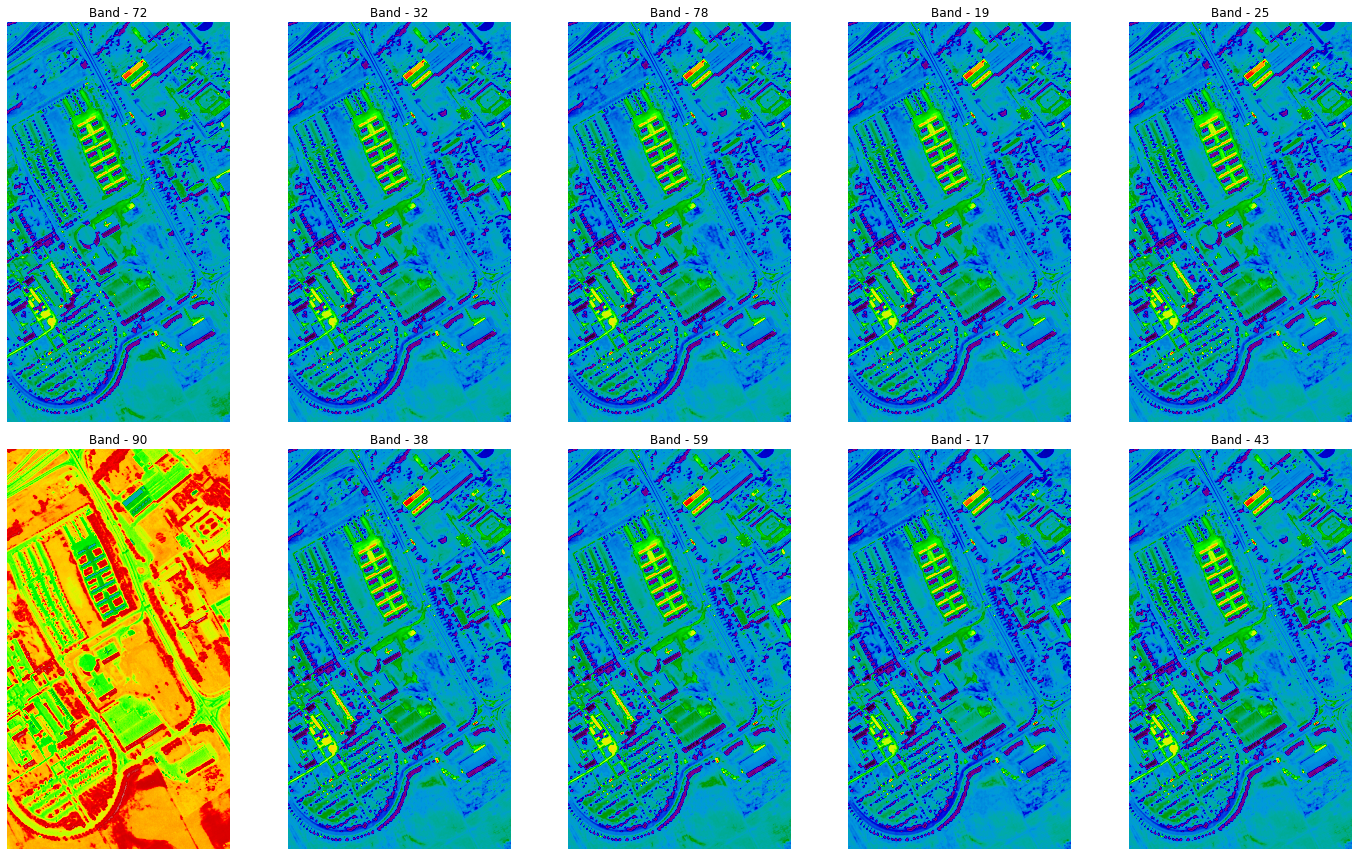

In [119]:
%matplotlib inline
fig=plt.figure(figsize=(20,12))

ax=fig.subplots(2,5)
for i in range(2):
    for j in range(5):
        c= np.random.randint(103)
        ax[i][j].imshow(decode[:, :, c], cmap='nipy_spectral')
        ax[i][j].axis('off')
        ax[i][j].title.set_text(f"Band - {c}")
        c+=1

plt.tight_layout()
      

In [56]:
encoded_imgs.mean()

1.2678939

In [57]:
import cv2

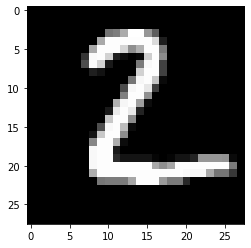

In [58]:
img=plt.imshow(x_test[1].reshape(28, 28))
plt.savefig('img1.png')

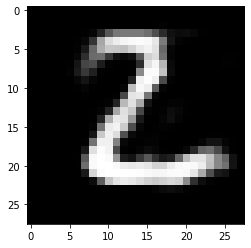

In [59]:
img1=plt.imshow(decoded_imgs[1].reshape(28, 28))
plt.savefig('img2.png')

In [71]:
img1=cv2.imread('img1.png')
img2=cv2.imread('img2.png')

In [61]:
psnr=cv2.PSNR(img1,img2)
psnr

22.98276072131783

In [62]:
from math import log10, sqrt 
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

psnr=PSNR(img1,img2)
psnr

38.29851197788686

In [84]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
mse = mean_squared_error(img1, img2)
ssim = ssim(img1, img2, data_range=img1.max() - img2.min(),multichannel=True)
print(mse,'\n',ssim)

327.1932146990741 
 0.9292491470647614


In [423]:
# encoder dimension
encoding_dim = 60

input_dim = Input(shape = (ncol, ), name = 'InputLayer')

In [428]:
encode_dim=60
input_img=keras.Input(shape=(ncol,))

In [435]:
305,170,60

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_73')>

In [451]:
x_test.shape,x_train.shape

((41480, 103), (165920, 103))

In [452]:
len(x_train)

165920

In [455]:
17*2*5*2*2*2*2*61,340 488,130

165920

In [457]:
x_train = np.reshape(x_train, (len(x_train), 340, 488,103))
x_test = np.reshape(x_test, (len(x_test), 340, 488,130))

ValueError: cannot reshape array of size 17089760 into shape (165920,340,488,130)

In [445]:
input_img = keras.Input(shape=(305,170,60))

x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)

encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [446]:
autoencoder.summary()

Model: "model_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_77 (InputLayer)        [(None, 305, 170, 60)]    0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 305, 170, 128)     69248     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 153, 85, 128)      0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 153, 85, 64)       73792     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 77, 43, 64)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 77, 43, 32)        18464     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 39, 22, 32)        0 

In [447]:
autoencoder.compile(optimizer=opt,loss='binary_crossentropy')

In [448]:
hist=autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=512,
                shuffle=False,
                validation_data=(x_test, x_test))


Epoch 1/25


ValueError: in user code:

    C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\input_spec.py:270 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer model_108: expected shape=(None, 305, 170, 60), found shape=(None, 103)
